In [3]:
#some magicto show the images inside the notebook
%pylab inline
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

# A hepler function for displaying images within the notebook.
# It displays an image, optionally applies zoom the image.
def show_image(img, zoom=1.5):
    dpi = 77
    plt.figure(figsize=(img.shape[0]*zoom/dpi,img.shape[0]*zoom/dpi))
    if len(img.shape) == 2:
        img = np.repeat(img[:,:,np.newaxis],3,2)        
    plt.imshow(img, interpolation='nearest')
    

# A hepler function for displaying images within the notebook.
# It may display multiple images side by side, optionally apply gamma transform, and zoom the image.
def show_images(imglist, zoom=1, needs_encoding=False):
    if type(imglist) is not list:
       imglist = [imglist]
    n = len(imglist)
    first_img = imglist[0]
    dpi = 77 # pyplot default?
    plt.figure(figsize=(first_img.shape[0]*zoom*n/dpi,first_img.shape[0]*zoom*n/dpi))
    for i in range(0,n):
        img = imglist[i]
        plt.subplot(1,n,i + 1)
        plt.tight_layout()    
        plt.axis('off')
        if len(img.shape) == 2:
           img = np.repeat(img[:,:,np.newaxis],3,2)
        plt.imshow(img, interpolation='nearest')    
    


Populating the interactive namespace from numpy and matplotlib


In [9]:
import cv2

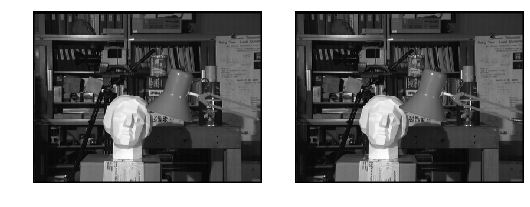

In [14]:
left = "tsukuba-imL.png"
right = "tsukuba-imR.png"
img_left = cv2.cvtColor(cv2.imread(left), cv2.COLOR_BGR2GRAY)
img_right = cv2.cvtColor(cv2.imread(right), cv2.COLOR_BGR2GRAY)
img_left = np.pad(img_left, pad_width=2, mode='constant', constant_values=0)
img_right = np.pad(img_right, pad_width=2, mode='constant', constant_values=0)

show_images([img_left, img_right]) #takes a region of the image

In [16]:
img_left.shape

(292, 388)

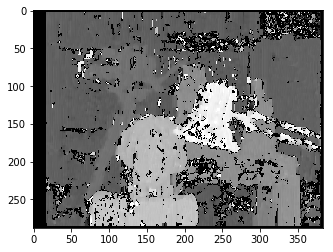

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread(left,0)
imgR = cv2.imread(right,0)

stereo = cv2.StereoBM_create(16,5)

disparity = stereo.compute(imgL, imgR)

plt.imshow(disparity,'gray')
plt.show()

In [31]:
disparity = 40
blocksize = 5
padd = int(blocksize / 2)
img_depth = np.zeros(img_left.shape)
for y in range(padd, img_left.shape[0] - padd - 1):
    print(y)
    for x in range(padd, img_left.shape[1] - padd - 1):
        
        block_left = img_left[y - padd: y + padd + 1, x - padd: x + padd + 1]
        res = np.ones(img_left.shape[1]) * 10000000*255**blocksize
        
        for k in range(max(padd, x - disparity), min(img_left.shape[1]- padd - 1, x + disparity)):
            
            block_right = img_right[y - padd: y + padd + 1, k - padd: k + padd + 1]
            
            res[k] = np.sum(np.abs(block_left - block_right))
            
        img_depth[y,x] = 16 - x + np.argmin(res)
            

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(None,)

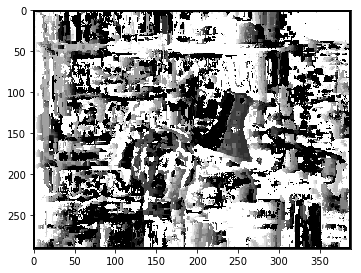

In [155]:
show_image(((img_depth)*256/16).astype(int)), 
# img_depth

In [57]:
x = np.arange(3)
x.resize(3*3,3)
x
class a():
    def __init__(self):
        self.LABELS = 3
        self.i = np.array((list(np.arange(self.LABELS)) * self.LABELS)).reshape(self.LABELS, self.LABELS)

In [60]:
a = a()
a.i[0,0] = 1
a.i

array([[1, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

In [89]:
%load_ext autoreload
%autoreload 2

In [98]:
Direction.up.value

2

In [152]:

from mrf import *

mrf = MRFStereo(*read_data(), init=True)



iteration 1 / 25, energy = 3826880
iteration 2 / 25, energy = 3534080
iteration 3 / 25, energy = 3474960
iteration 4 / 25, energy = 3467200
iteration 5 / 25, energy = 3472680
iteration 6 / 25, energy = 3482400
iteration 7 / 25, energy = 3492520
iteration 8 / 25, energy = 3507280
iteration 9 / 25, energy = 3523280
iteration 10 / 25, energy = 3537640
iteration 11 / 25, energy = 3552960
iteration 12 / 25, energy = 3569200
iteration 13 / 25, energy = 3585840
iteration 14 / 25, energy = 3603111
iteration 15 / 25, energy = 3619596
iteration 16 / 25, energy = 3635961
iteration 17 / 25, energy = 3651246
iteration 18 / 25, energy = 3584134
iteration 19 / 25, energy = 3584414
iteration 20 / 25, energy = 3584934
iteration 21 / 25, energy = 3584054
iteration 22 / 25, energy = 3583454
iteration 23 / 25, energy = 3584134
iteration 24 / 25, energy = 3583734
iteration 25 / 25, energy = 3583574


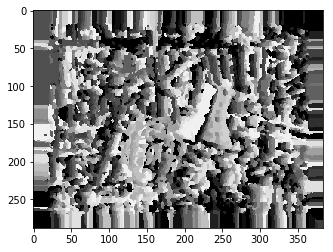

In [153]:
mrf.run(25)


iteration 1 / 1, energy = 4916880


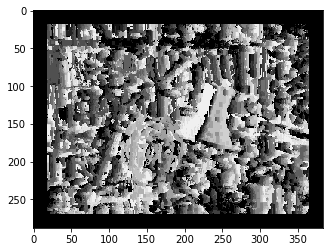

In [154]:
mrf2 = MRFStereo(*read_data(), init=True)
mrf2.run(1)

iteration 1 / 1, energy = 6377040


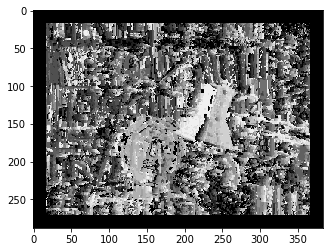

In [188]:
l, r = read_data()
mrf3 = MRFStereo(l, r, LABELS=16)
im3 = mrf3.run(1)

iteration 1 / 50, energy = 4436286


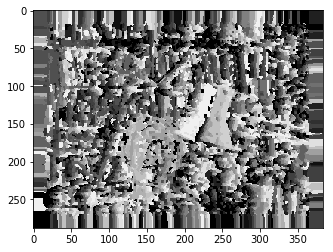

iteration 2 / 50, energy = 4435926


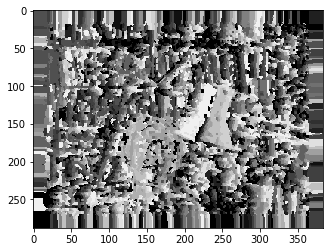

iteration 3 / 50, energy = 4435886


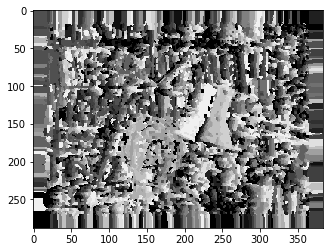

iteration 4 / 50, energy = 4435926


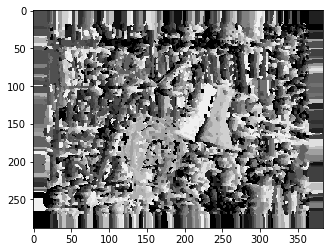

iteration 5 / 50, energy = 4436006


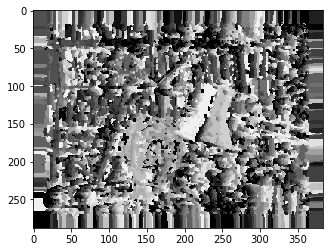

iteration 6 / 50, energy = 4435486


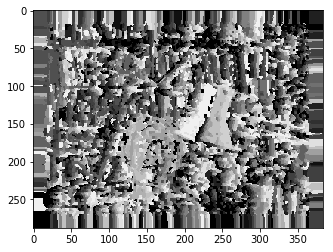

iteration 7 / 50, energy = 4435606


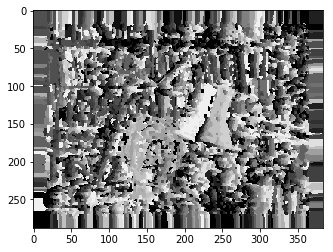

iteration 8 / 50, energy = 4435446


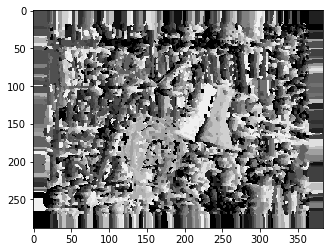

iteration 9 / 50, energy = 4435326


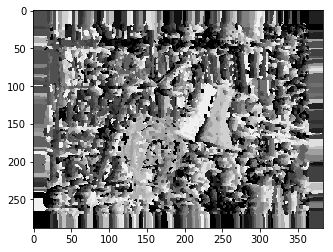

iteration 10 / 50, energy = 4435486


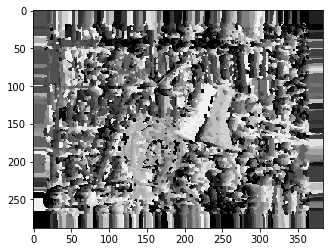

iteration 11 / 50, energy = 4435686


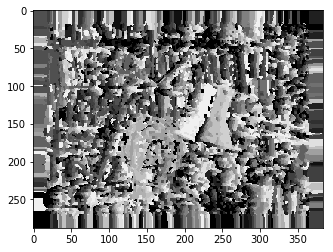

iteration 12 / 50, energy = 4435446


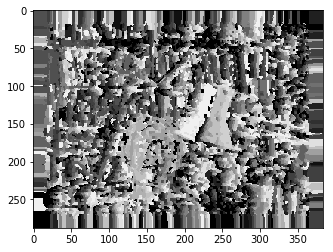

iteration 13 / 50, energy = 4435526


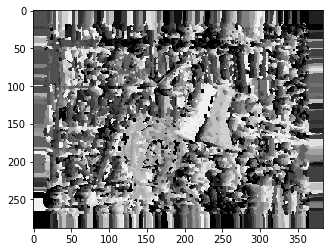

iteration 14 / 50, energy = 4435566


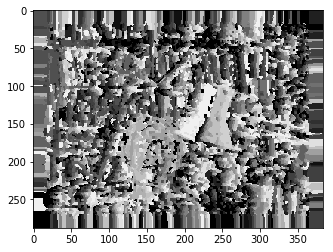

iteration 15 / 50, energy = 4435486


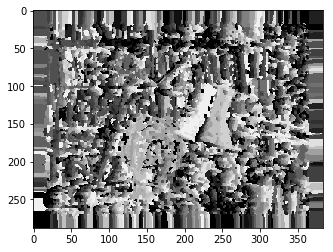

iteration 16 / 50, energy = 4435206


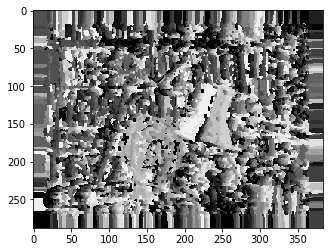

iteration 17 / 50, energy = 4435166


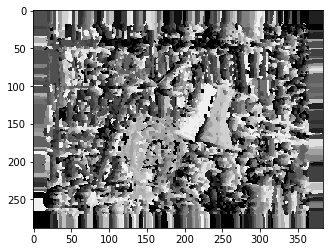

iteration 18 / 50, energy = 4435366


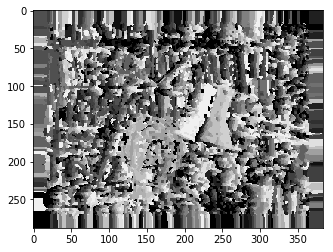

iteration 19 / 50, energy = 4435206


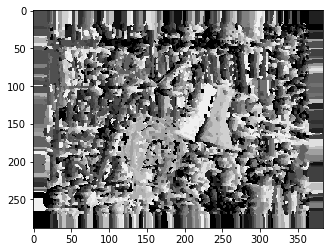

iteration 20 / 50, energy = 4435366


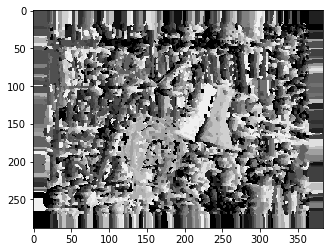

iteration 21 / 50, energy = 4435366


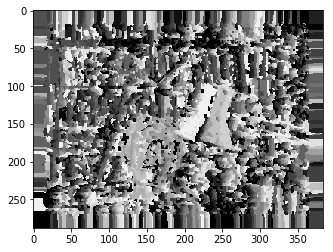

iteration 22 / 50, energy = 4435006


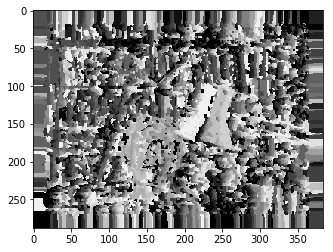

iteration 23 / 50, energy = 4434886


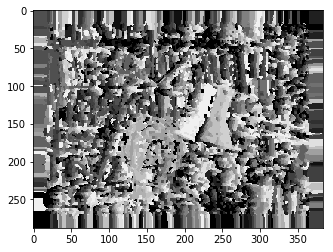

In [ ]:
im3 = mrf3.run(50)

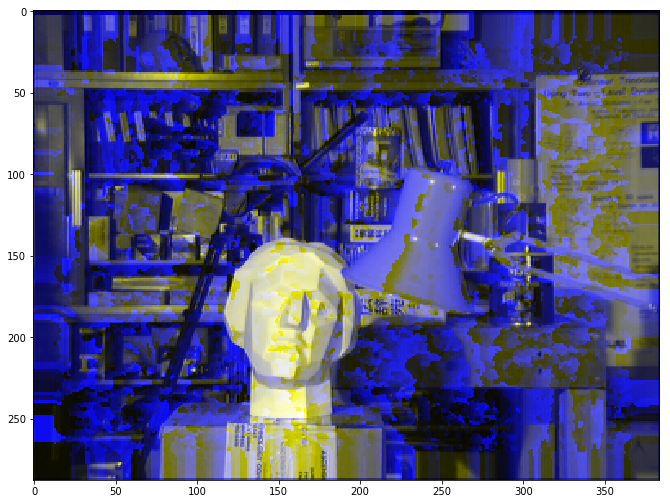

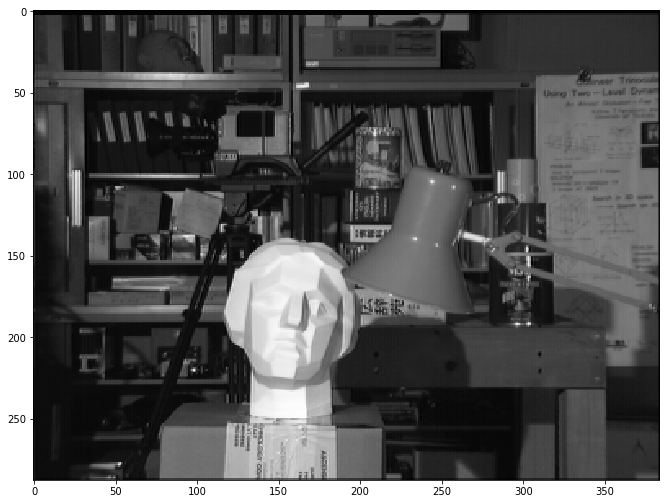

In [192]:
show_image(np.stack([l,l, im3], axis=-1), 3)
show_image(l,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


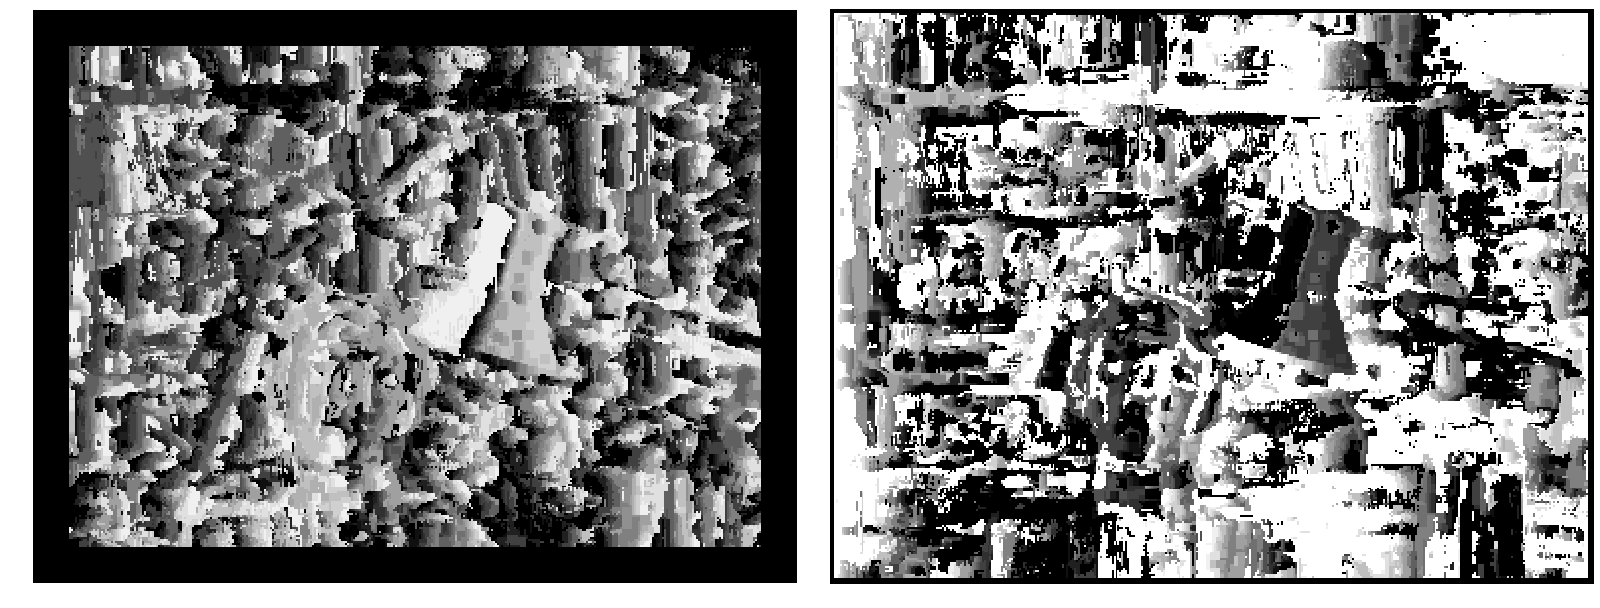

In [162]:
show_images([im2,mine], 3)

In [161]:
mine = ((img_depth)*256/16).astype(int)